In [1]:
import os
from datetime import datetime, timedelta
import pandas as pd
import os

from dotenv import dotenv_values

import myenergi

env_path = os.path.expanduser("~/.env")
if os.path.exists(env_path):
    env = dotenv_values(env_path)

with myenergi.API(env.get('myenergi_serial'), env.get('myenergi_password')) as mye:
    # For each zappi detected for the account
    for zappiserial in (mye.get_serials(myenergi.MyenergiType.ZAPPI) or []):
        starttime = datetime.now() - timedelta(days=1)
        datestring = starttime.strftime("%Y-%m-%d")
        history = mye.get_zappi_daily_total(zappiserial, datestring, 50)

    data = pd.DataFrame(history.history_data)


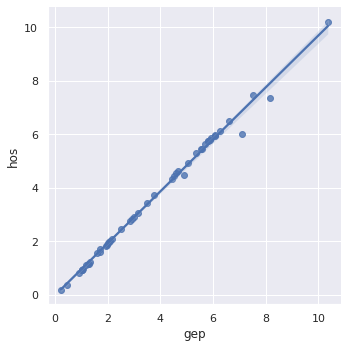

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

sns.lmplot(x="gep", y="hos", data=data)

In [4]:
data.corr().abs()[["hos"]]

,hos
hog,0.412104
hos,1.000000
h1d,0.008763
h1b,0.177953
imp,0.307540
exp,0.292181
gep,0.997294
gen,0.617152
